# Grover search: subset problem

We define a function named `subset_sum(i,j)` that returns the sum of the elements `i` and `j` of a list `l`. We want to use a Grover search to find which `i` `j` combination led to a given value.

In [1]:
from qlasskit import qlassf, Qint2, Qint3
from typing import Tuple

@qlassf
def subset_sum(ii: Tuple[Qint2, Qint2]) -> Qint3:
    l = [0, 5, 2, 3]
    return l[ii[0]] + l[ii[1]] if ii[0] != ii[1] else 0

We now can use our quantum function as an oracle for a Grover search. For instance, we want to find the input value that produce the value `7`. Since we know that there are at least two result (`(i,j)` and `(j,i)`), we set `n_matching=2`.

In [4]:
from qlasskit.algorithms import Grover

q_algo = Grover(subset_sum, Qint3(7), n_matching=2)

Now we can use our prefered framework and simulator for sampling the result; this is an example using `qiskit` with `aer_simulator`.

In the output histogram, it's now evident that the input leading to a value of `7` are the tuples `(1,2)` and `(2,1)` (5+2 and 2+5), aligning with our expectations.


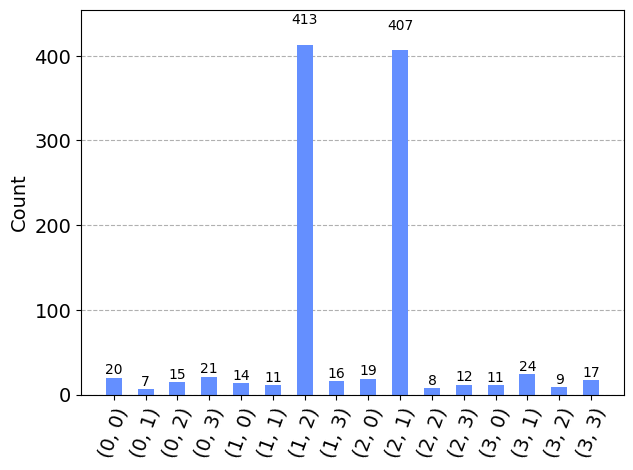

In [6]:
from qiskit import Aer, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

qc.measure_all()
simulator = Aer.get_backend("aer_simulator")
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = q_algo.decode_counts(counts)
plot_histogram(counts_readable)